Notebook to create plots for displaying in illustrator

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

In [2]:
# Load in thalamus dataset
thData = sc.read("../Data/thData.h5ad")

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


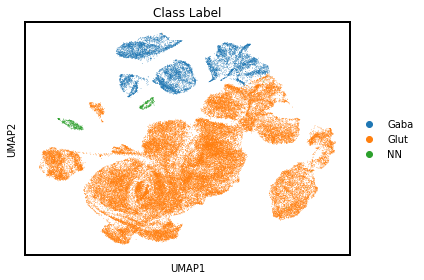

In [3]:
# Class UMAP plot
ax = sc.pl.umap(thData, color="class_label",show=False)
ax.figure.set_size_inches(6,4)
plt.tight_layout()
ax.set_rasterized(True)
# plt.xlabel('UMAP1', fontsize=16)
# plt.ylabel('UMAP2', fontsize=16)
plt.title('Class Label')
plt.setp(ax.spines.values(), linewidth=2)
# plt.legend(["","Gaba","Glut","NN"],fontsize=16)
plt.savefig("../Figures/Panels/Class_UMAP.pdf", dpi=120, transparent=True)

In [49]:
# function to create a mask dictionary for umap plotting
def create_mask_dict(dataObj):
    """ Function to create a mask dictionary for subclass plotting, where glutamatergic 
     subclasses have color labels, while other classes are grayed out """
    import matplotlib.colors
    names = dataObj.obs["subclass_label"].unique() 
    mask_dict = {}
    for name in names:
        if name in ["Endo", "Astro", "TH/HY Gata3", "HY/TH Gnb3", "TH/HY Pax6", "TH Otx2", "HY Lhx1"]:
            mask_dict[name] = matplotlib.colors.to_rgb("#D3D3D3")
        else:
            mask_dict[name] = matplotlib.colors.to_rgb(dataObj[dataObj.obs.subclass_label == name].obs["subclass_color"].unique()[0])
    return mask_dict

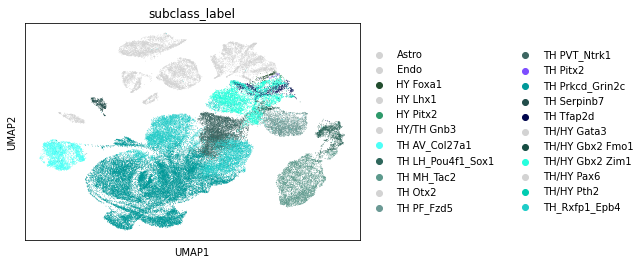

In [50]:
color_dict = create_mask_dict(thData)
sc.pl.umap(thData, color = "subclass_label",palette = color_dict)
# color_dict
